# Flight Price Prediction  Project

Problem Statement:
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 1. Time of purchase patterns (making sure last-minute purchases are expensive) 2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

2. Data Analysis
After cleaning the data, you have to do some analysis on the data. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

3. Model Building
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like
    1. Data Cleaning
    2. Exploratory Data Analysis
    3. Data Pre-processing
    4. Model Building
    5. Model Evaluation
    6. Selecting the best model

# Price: The price of the ticket (Target Variable)

Since Price is a continous data. we will be using regression models here. Let us import the necessary libraries for that

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

we have imported required model. Libraries apart from this can be loaded if needed 

In [2]:
#loading the data for model building
data=pd.read_csv("Flight_Price.csv")

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.shape

(10683, 11)

There are 10863 rows and 11 columns including Price (target variable)

In [5]:
# to get basic information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


we can see most of the datas as categorical. let us deep dive on that

In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

some of the columns are categorical which need to be encoded. The date,duration and time columns are to be changed to time stamp format to get the data cleaned. The price column that is the target column is of continous type

In [7]:
#Missing values in train data

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have only 2 null values in dataset we can drop it

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null values removed from training dataset

There are no null values in the training dataset

# Exploratory Data Analysis

data cleaning

From info we can  see that there are columns which has to be changed to time stamp and derive data so that we can use the data for prediction properly

In [10]:
#converting columns like date of journey, deptarture time and arrival time into time stamp to extract data using function (Training data)

def datetime(col):
    data[col]=pd.to_datetime(data[col])
    
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    datetime(i)

In [11]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

The data type changed to datetime for required columns as shown above

In [12]:
#Now we can extract day and month from Date_of_Journey using dt.day and dt.month
#train data
data['Day_of_Journey']=data['Date_of_Journey'].dt.day
data['Month_of_Journey']=data['Date_of_Journey'].dt.month

#since we have extracted the required data from the column. we can drop the Date_of_Journey column from the dataset
data.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
data.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2021-10-15 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2021-10-15 05:50:00,2021-10-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2021-10-15 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2021-10-15 18:05:00,2021-10-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2021-10-15 16:50:00,2021-10-15 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,2021-10-15 09:00:00,2021-10-15 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2021-10-15 18:55:00,2021-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2021-10-15 08:00:00,2021-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2021-10-15 08:55:00,2021-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,2021-10-15 11:25:00,2021-10-15 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [14]:
#to shoe all columns as columns may increase in further cleaning process
pd.set_option('display.max_columns',None)

From Arrival_time and Dept_time features, we can extract hour and minutes. we will store in new columns and drop parent column

In [15]:
#Let's create function for extracting hours and minutes

def extract_hours(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_minutes(data,col):
    data[col+'_minute']=data[col].dt.minute
    
def drop_col(data,col):            #to drop the column after extraction
    data.drop(col,axis=1,inplace=True)


In [16]:
#call the function
#Dep_Time
extract_hours(data,'Dep_Time')
extract_minutes(data,'Dep_Time')
drop_col(data,'Dep_Time')

#Arrival_Time
extract_hours(data,'Arrival_Time')
extract_minutes(data,'Arrival_Time')
drop_col(data,'Arrival_Time')


In [17]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


we have extracted data from time stamp columns. Now dealing with Duaration column. Separate Duration hours and minute from duration column

In [18]:
#duration column 

duration=list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]
            
data['Duration']=duration

In [19]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
# extracting hour and minute separetely
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

data['duration_hour']=data['Duration'].apply(hour)
data['duration_minutes']=data['Duration'].apply(minute)

data.drop('Duration',axis=1,inplace=True)                         #dropping parent column
data['duration_hour']=data['duration_hour'].astype(int)           #changing datatype into int for data extracted
data['duration_minutes']=data['duration_minutes'].astype(int)

In [21]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Day_of_Journey          int64
Month_of_Journey        int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
duration_hour           int32
duration_minutes        int32
dtype: object

Now we have only categorical columns as object. All the other columns are datatype is correcteed. Let us do it for Test data also

In [22]:
#Finding categorical value
column=[column for column in data.columns if data[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [23]:
#finding the continous value 
cont_col=[cont_col for cont_col in data.columns if data[cont_col].dtype!='object']
cont_col

['Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'duration_hour',
 'duration_minutes']

# Handling Categorical data

In [24]:
categorical=data[column]

In [25]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info


we are having only categorical data which can be visualized and encoded one by one

# Airline VS Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

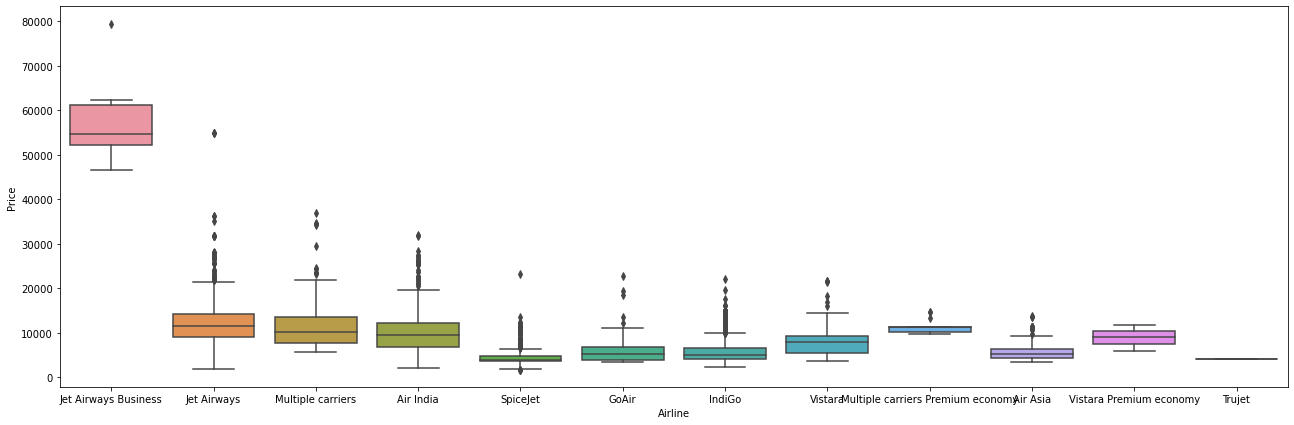

In [26]:
plt.figure(figsize=(22,7))
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))

Jet Airways Business have the highest range of price. Apart from the first airline almost all are having similar median

# Total_stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

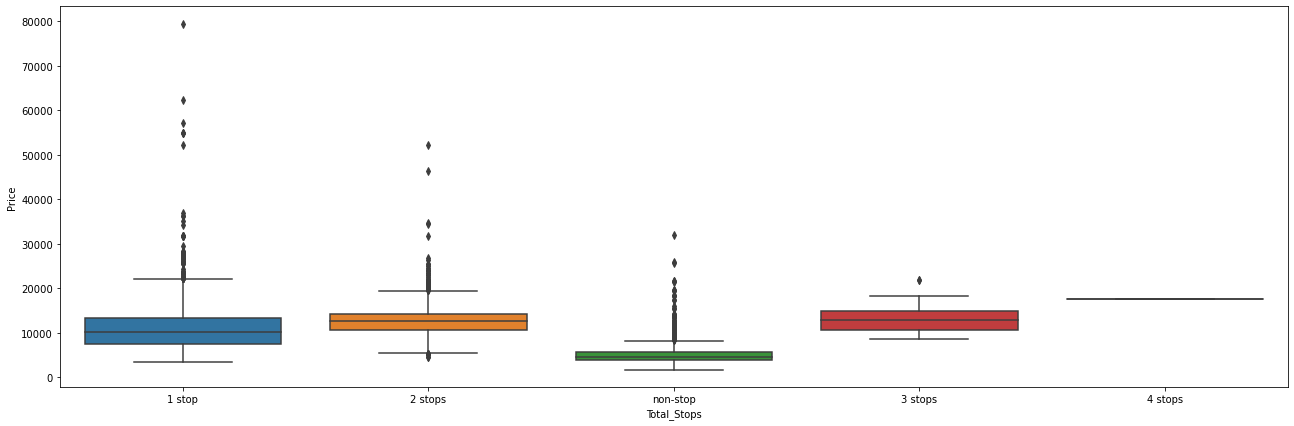

In [27]:
plt.figure(figsize=(22,7))
sns.boxplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))

we can see price ranging on total stops . It is of nearly similar median

In [28]:
#As airline is Nominal Categorical Data we can encode it using One Hot Encoding technique

Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
#Source column

categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# Source vs price

<Figure size 1584x720 with 0 Axes>

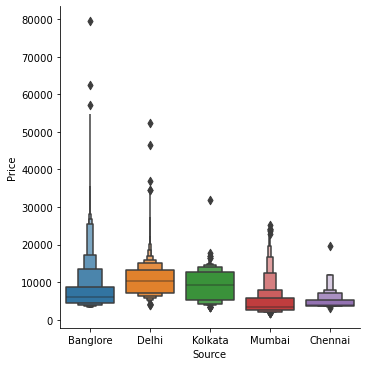

In [30]:
plt.figure(figsize=(22,10))
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen')

Bangalore is costly as source

In [31]:
#encoding of source column
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


source column is encoded

In [32]:
#now let's check Destination column
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

# Destination vs Price analysis

<AxesSubplot:xlabel='Destination', ylabel='Price'>

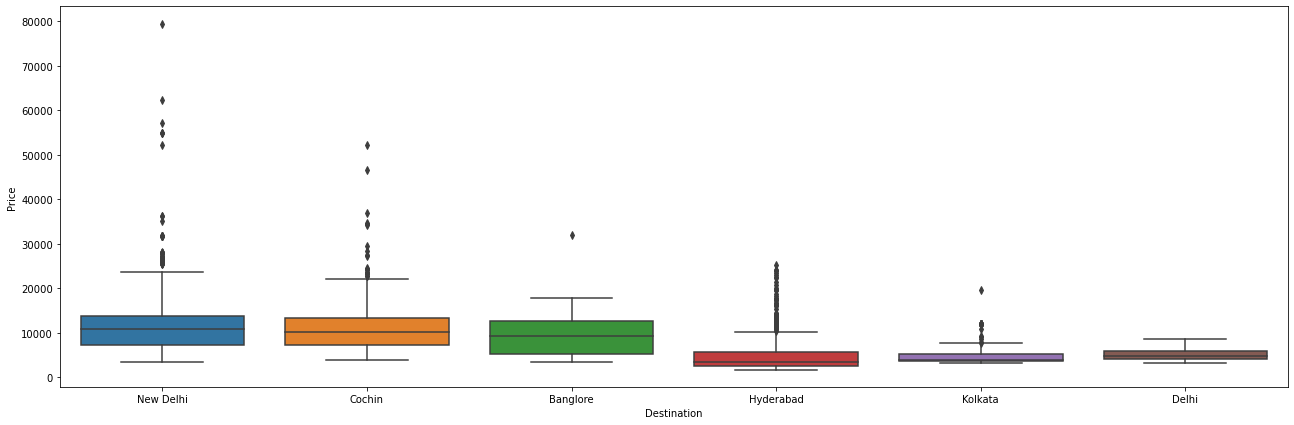

In [33]:
plt.figure(figsize=(22,7))
sns.boxplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False))

New delhi is costlier as destination

In [34]:
#encoding
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [35]:
#now let us deal with Route column. It is looking with arrows characters which need to be extracted properly

categorical['Route'].value_counts()

DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BOM ? RPR ? VTZ ? HYD             1
BOM ? VNS ? DEL ? HYD             1
BLR ? HBX ? BOM ? BHO ? DEL       1
BOM ? DED ? DEL ? HYD             1
CCU ? RPR ? HYD ? BLR             1
Name: Route, Length: 128, dtype: int64

In [36]:
#extracting
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [37]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR ? DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU ? IXR ? BBI ? BLR,NaN,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL ? LKO ? BOM ? COK,NaN,NaN,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU ? NAG ? BLR,NaN,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR ? NAG ? DEL,NaN,NaN,NaN,NaN


In [38]:
drop_col(categorical,'Route')

In [39]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2             10682
Route3             10682
Route4             10682
Route5             10682
dtype: int64

we can see NaN Values in route 3,4,5 as we don't have data

In [40]:
#replacing NaN Values
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace=True)

In [41]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2             10682
Route3                 0
Route4                 0
Route5                 0
dtype: int64

In [42]:
#to know categories of data
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 128 categories
Route2 has total 0 categories
Route3 has total 1 categories
Route4 has total 1 categories
Route5 has total 1 categories


In [43]:
#Applying Label encoder for encoding extracted data from route

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=LE.fit_transform(categorical[i])

In [44]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,18,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,No info,84,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,No info,118,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,91,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,No info,29,0,0,0,0


In [45]:
#we can drop additional_info as it doesn't add any impact. single type of data mostly
drop_col(categorical,'Additional_Info')

In [46]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [47]:
#Encoding Total stops
dict={'non-stop':0,'2 stops':2,'1 stop':1, '3 stops':3, '4 stops':4}

In [48]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [49]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,18,0,0,0,0
1,Air India,Kolkata,Banglore,2,84,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,118,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,91,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,29,0,0,0,0


In [50]:
#we can drop Airline Source and Destination as we have already extracted it separately
drop_col(categorical,'Airline')
drop_col(categorical,'Source')
drop_col(categorical,'Destination')

We have pre processed all data and the data is clean now. Let's join back all the columns

In [51]:
final_data = pd.concat([categorical,Airline,Source,Destination,data[cont_col]],axis=1)

In [52]:
final_data.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minutes
0,0,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,91,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


so we have made data ready for modelling. we can do the same preprocessing in test data

In [53]:
final_data  #final data for training

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minutes
0,0,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,91,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107,4,9,19,55,22,25,2,30
10679,0,64,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145,27,4,20,45,23,20,2,35
10680,0,18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7229,27,4,8,20,11,20,3,0
10681,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12648,3,1,11,30,14,10,2,40


The data is clean and ready for modelling

# Missing Values

In [54]:
final_data.isnull().sum()

Total_Stops                          0
Route1                               0
Route2                               0
Route3                               0
Route4                               0
Route5                               0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

There are no missing values

In [55]:
data=final_data.copy()   #copying it into data and df again for easy visulaization of names

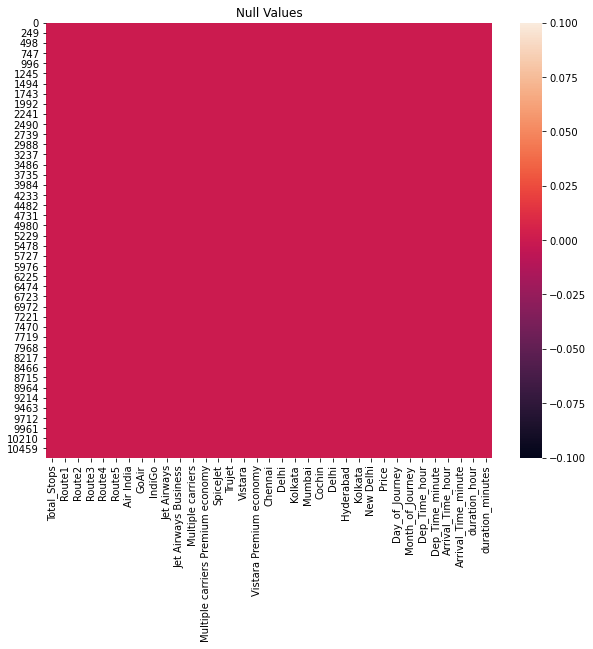

In [56]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

This clearly shows there are no missing values in the dataset

In [57]:
data.dtypes

Total_Stops                          int64
Route1                               int32
Route2                               int64
Route3                               int32
Route4                               int32
Route5                               int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad  

All the data types are fine

# Statistical summary

In [58]:
data.describe()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minutes
count,10682.000000,10682.000000,10682.0,10682.0,10682.0,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,74.820165,0.0,0.0,0.0,0.0,0.163921,0.018161,0.192192,0.360326,0.000562,0.111964,0.001217,0.076577,0.000094,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,36.729039,0.0,0.0,0.0,0.0,0.370221,0.133541,0.394042,0.480117,0.023695,0.315337,0.034866,0.265932,0.009676,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,48.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,73.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,104.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,127.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


Since most of the columns are categorical type. we have to deal only with Price column which is continous. There are possible outliers in the column as there is a huge difference between 75th percentile and maximum values

As Price is in continous data. The model will be of Regression type

# Correlation Check

In [59]:
datacor=data.corr()

In [60]:
datacor

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minutes
Total_Stops,1.000000,0.455130,NaN,NaN,NaN,NaN,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302,0.603897,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Route1,0.455130,1.000000,NaN,NaN,NaN,NaN,0.018514,-0.065494,-0.028954,-0.073606,-0.022368,0.292683,0.027733,-0.049392,-0.005222,-0.099095,-0.009349,0.273235,0.749783,-0.093355,-0.195197,0.749783,-0.567025,-0.195197,0.273235,-0.526147,0.164149,0.096601,0.042194,-0.075002,-0.068071,0.013898,-0.173352,0.295444,-0.232427
Route2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air India,0.271094,0.018514,NaN,NaN,NaN,NaN,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,-0.127510,-0.004284,-0.095939,-0.007421,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072,0.050432,-0.037279,-0.000281,-0.012879,-0.045688,0.088872,0.061231,0.261707,-0.033427
GoAir,-0.060110,-0.065494,NaN,NaN,NaN,NaN,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,-0.004747,-0.039166,-0.001316,-0.029469,-0.002280,-0.026156,-0.009049,-0.042921,-0.035933,-0.009049,0.099863,-0.035933,-0.026156,0.017573,-0.095151,0.002350,-0.017538,-0.016373,0.076751,0.018526,0.096839,-0.094044,0.067215
IndiGo,-0.302991,-0.028954,NaN,NaN,NaN,NaN,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,-0.017026,-0.140464,-0.004720,-0.105686,-0.008175,0.141911,-0.080168,-0.057229,0.059686,-0.080168,0.090354,0.059686,0.141911,-0.018626,-0.361070,0.013223,-0.037203,-0.023395,-0.014714,-0.071491,0.035124,-0.346230,0.119817
Jet Airways,0.215063,-0.073606,NaN,NaN,NaN,NaN,-0.332324,-0.102076,-0.366085,1.000000,-0.017793,-0.266497,-0.026199,-0.216132,-0.007262,-0.162619,-0.012580,-0.144341,-0.019108,0.097428,-0.025382,-0.019108,-0.051787,-0.025382,-0.144341,0.056782,0.416124,-0.028387,0.057818,0.113942,0.024455,-0.027377,-0.057698,0.307196,-0.084052


<AxesSubplot:>

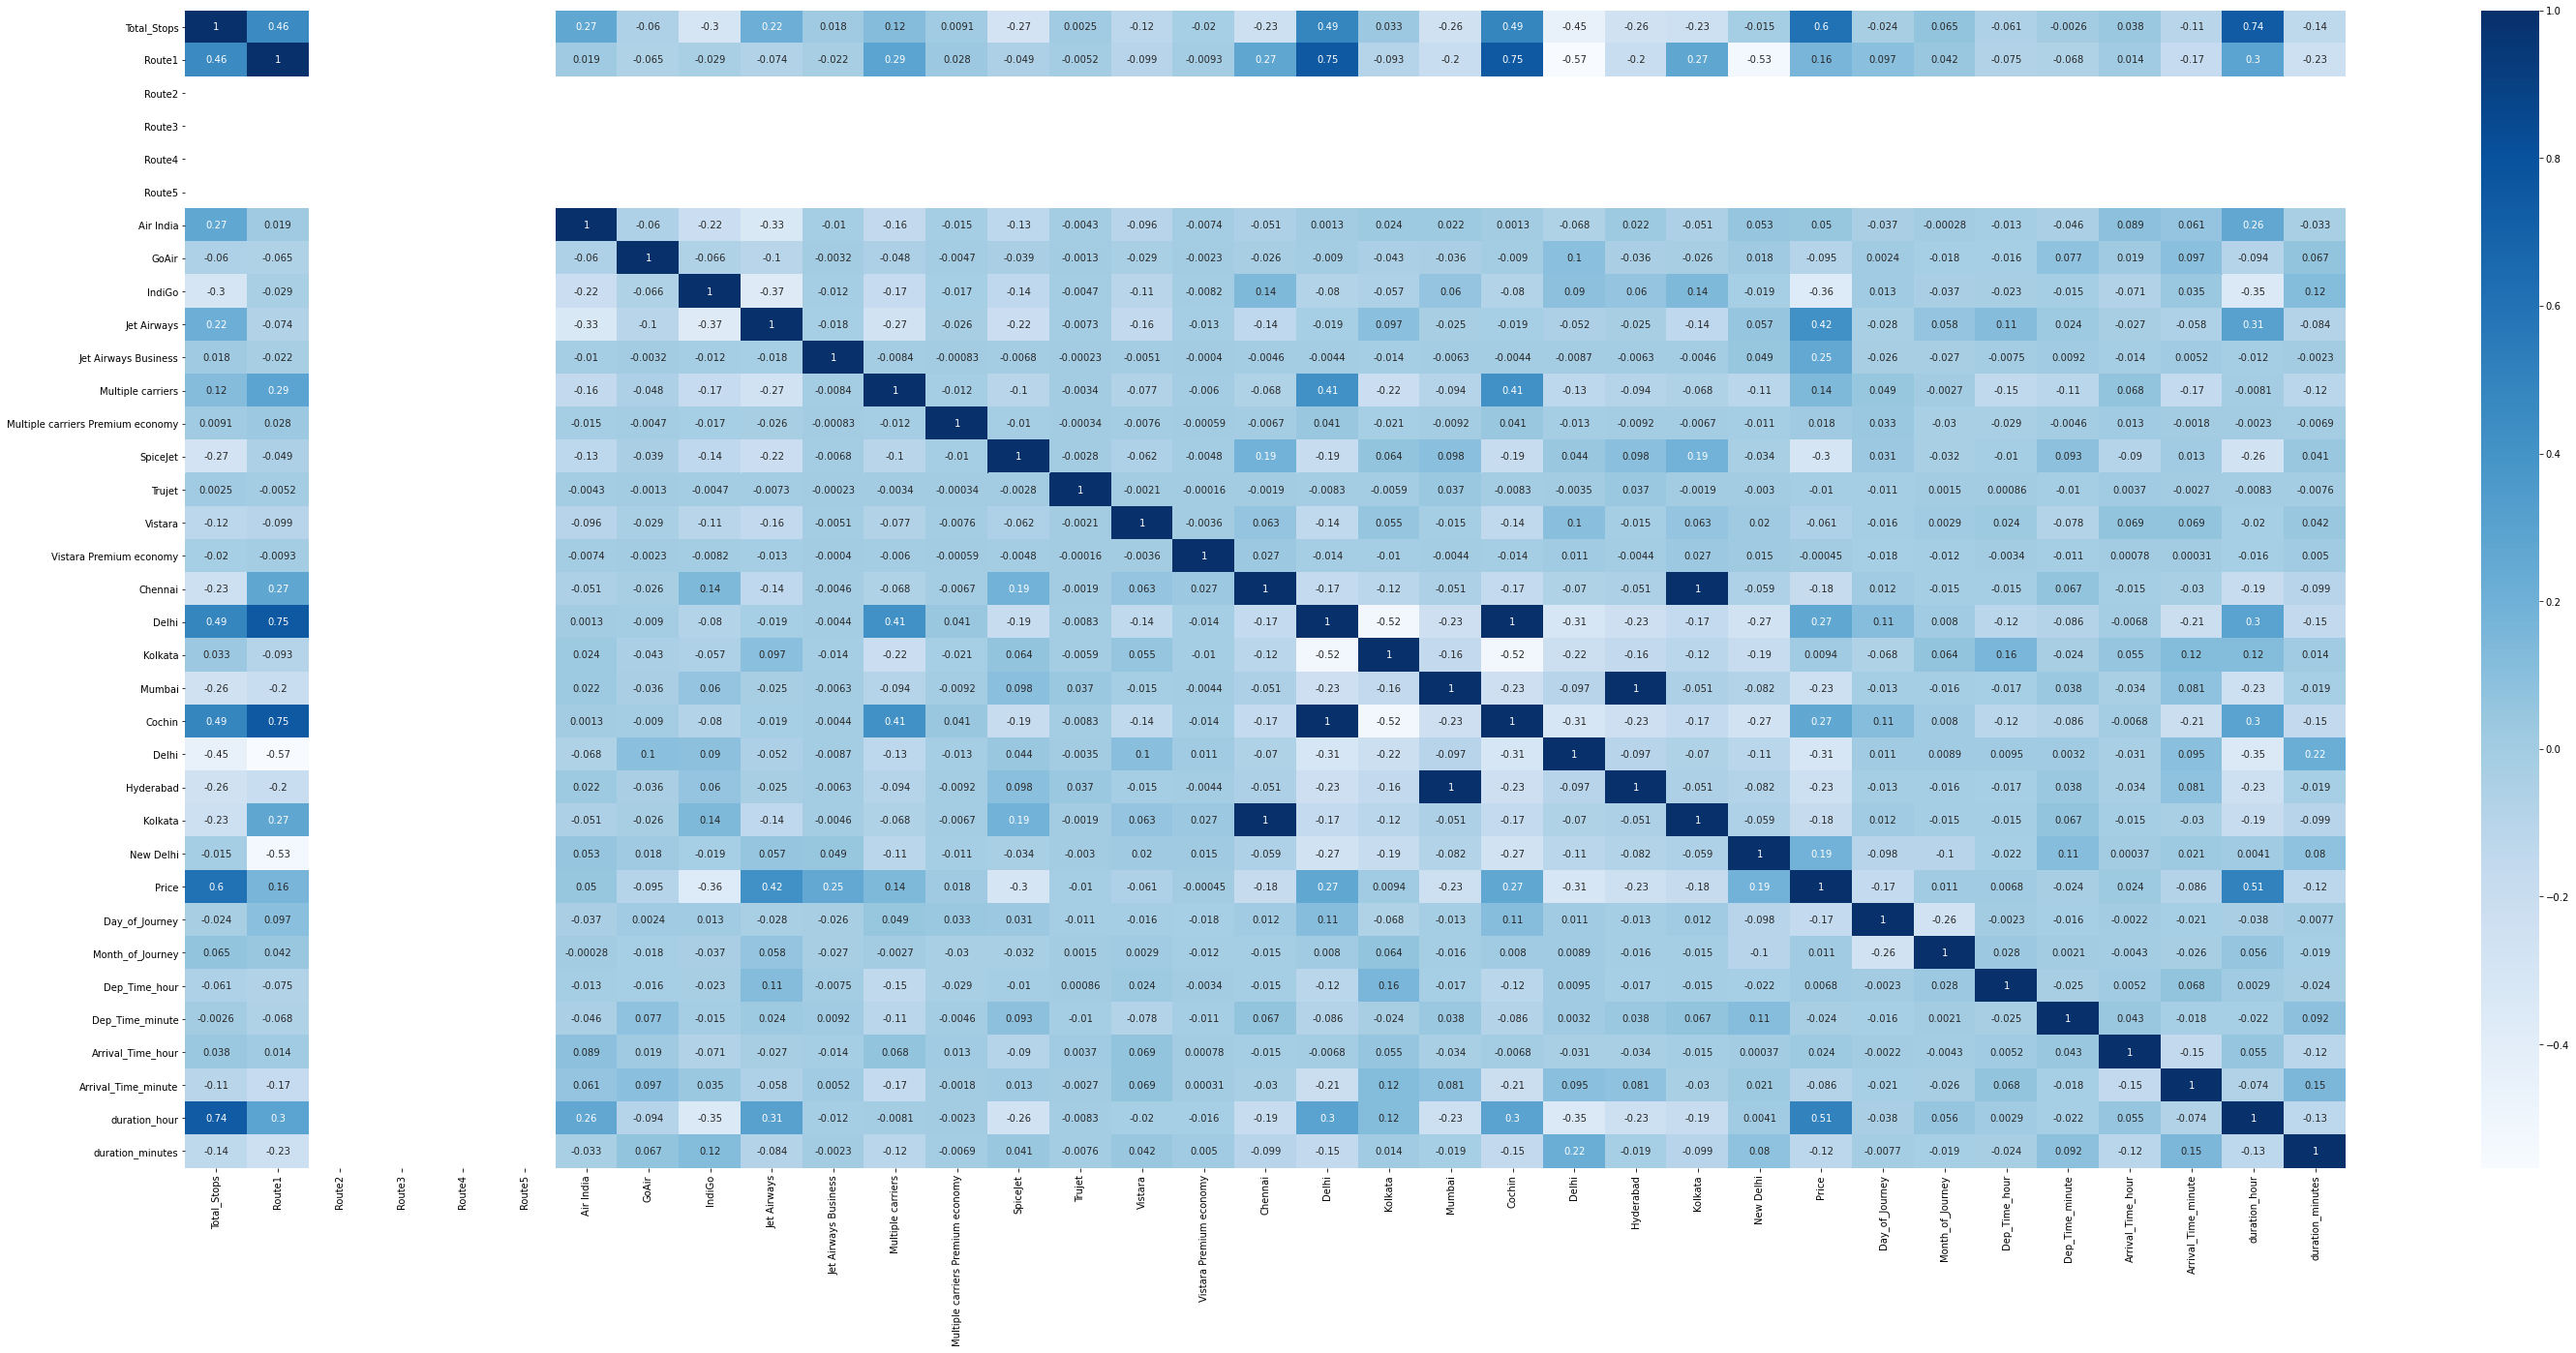

In [61]:
plt.figure(figsize=(50,22))
sns.heatmap(datacor,cmap='Blues',annot=True)

Since the data is visualized in large size. difficult to interpret. Let us visualize only price column with other column such that we get good insights

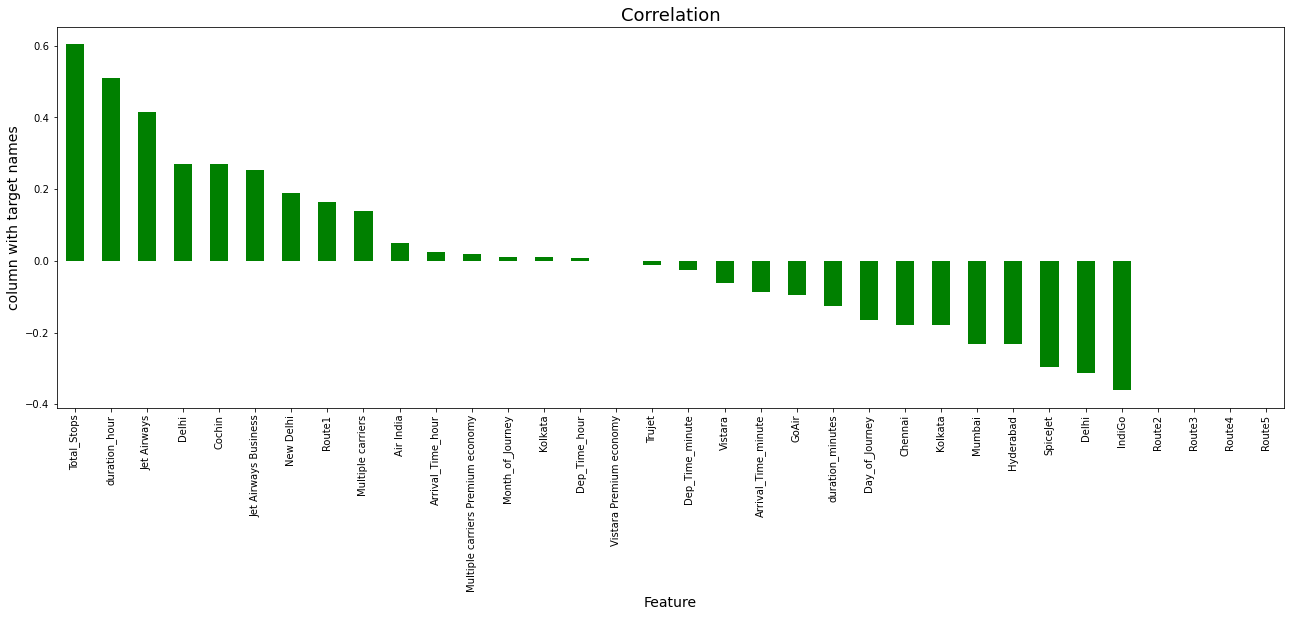

In [62]:
plt.figure(figsize=(22,7))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='green')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

This column shows how each feature column is correlated with the Price column. WE can drop some of the columns which have nearly zero correlation. we can keep it for now. Total_stops are higly positively correlated and Route3 is highly negatively correlated column

Since all other datas are categorical , we need not remove outliers from them but as fees is a continous data. let us try removing outliers data from that. As True jet is least correlated and not present in test dataset we can remove it

# Target Variable Analysis  - Checking outliers

<AxesSubplot:xlabel='Price', ylabel='Density'>

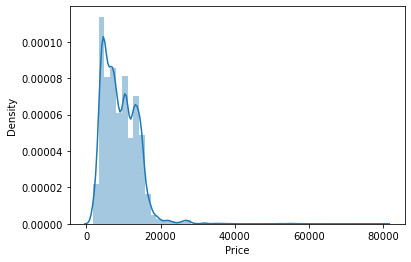

In [63]:
sns.distplot(data.Price)

The price higher than 40,000 should be replaced by median to remove the outliers and skewness. The data distributed is rightly skewed

<AxesSubplot:xlabel='Price'>

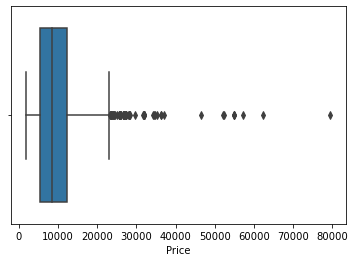

In [64]:
sns.boxplot(data.Price)

Conclusion is The price higher than 40,000 should be replaced by median to remove the outliers and skewness.

# Handling Outliers

we have some outliers in Price column. we can replace t by median

In [65]:
data['Price']=np.where(data['Price']>=40000,data['Price'].median(),data['Price'])

<AxesSubplot:xlabel='Price'>

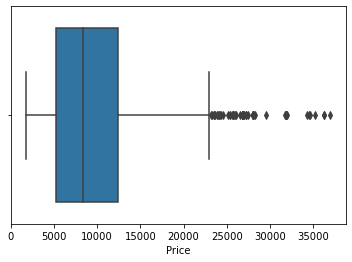

In [66]:
sns.boxplot(data.Price)

<AxesSubplot:xlabel='Price', ylabel='Density'>

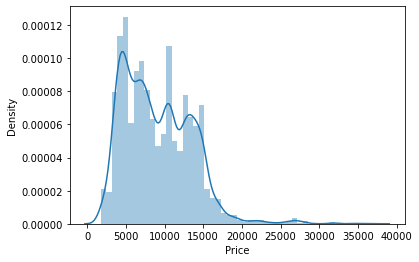

In [67]:
sns.distplot(data.Price)

Now data looks much better

In [68]:
#removing true jet as it is low correlated and doesn't present in test dataset
drop_col(data,'Trujet')

As most of the data is categorical. we neednot remove skewness 

# Model Building

In [69]:
#initialization of x and y
x=data.drop('Price',axis=1)
y=data['Price']

In [70]:
x.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hour,duration_minutes
0,0,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,84,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,91,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [71]:
x.shape

(10682, 33)

In [72]:
y.shape

(10682,)

In [73]:
#finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.6348161619996939  on random_state  154


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=154)

In [75]:
#shapes of x and y (train,test)
x_train.shape

(7156, 33)

In [76]:
x_test.shape

(3526, 33)

In [77]:
y_train.shape

(7156,)

In [78]:
y_test.shape

(3526,)

In [79]:
# different algorithm going to use
from sklearn.ensemble import GradientBoostingRegressor

lr=LinearRegression()
dtr=DecisionTreeRegressor()
svr=SVR()
rfr=RandomForestRegressor()
adr=AdaBoostRegressor(n_estimators=200)
gdr=GradientBoostingRegressor()
knn=KNeighborsRegressor()

In [80]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    
    print("r2_score(predicted_train) is ",r2_score(y_train,mod.predict(x_train)))
    print("\n")
    print("r2_score is :",r2_score(y_test,pred))
    print("\n")
    print("Score of trained data :",mod.score(x_train,y_train))
    print("\n")
    print("Score of test data :",mod.score(x_test,y_test))
    print("\n")
    print("Error")
    print("mean absolute error (MAE): ",mean_absolute_error(y_test,pred))
    print("mean squared error (MSE): ",mean_squared_error(y_test,pred))
    print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))
    sns.distplot(y_test-pred)

LinearRegression()
r2_score(predicted_train) is  0.6015294021132312


r2_score is : 0.6348161619996939


Score of trained data : 0.6015294021132312


Score of test data : 0.6348161619996939


Error
mean absolute error (MAE):  1915.029418852575
mean squared error (MSE):  6998548.241340756
RMSE 2645.476940239842


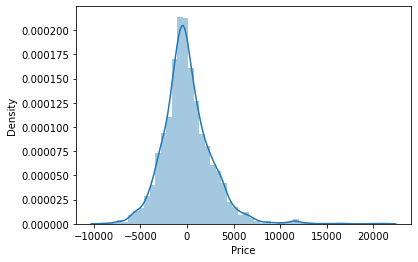

In [81]:
eval(lr)

DecisionTreeRegressor()
r2_score(predicted_train) is  0.9707553182106101


r2_score is : 0.7258094939198885


Score of trained data : 0.9707553182106101


Score of test data : 0.7258094939198885


Error
mean absolute error (MAE):  1292.9181650595574
mean squared error (MSE):  5254710.872822604
RMSE 2292.315613702137


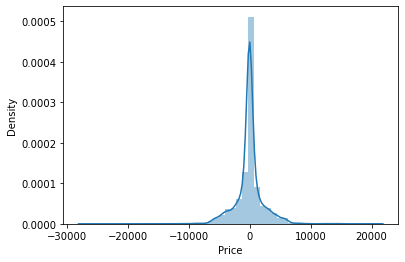

In [82]:
eval(dtr)

RandomForestRegressor()
r2_score(predicted_train) is  0.9549062560590136


r2_score is : 0.8214634805674554


Score of trained data : 0.9549062560590136


Score of test data : 0.8214634805674554


Error
mean absolute error (MAE):  1124.262583054432
mean squared error (MSE):  3421554.60913001
RMSE 1849.744471306783


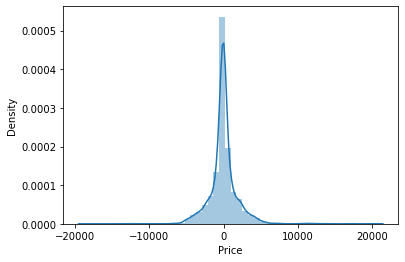

In [83]:
eval(rfr)

SVR()
r2_score(predicted_train) is  0.0032447123303604997


r2_score is : 0.010774348953427548


Score of trained data : 0.0032447123303604997


Score of test data : 0.010774348953427548


Error
mean absolute error (MAE):  3503.2926424740613
mean squared error (MSE):  18957967.795977194
RMSE 4354.074849606653


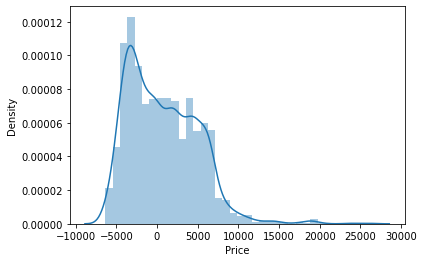

In [84]:
eval(svr)

It is overfittin/underfitting

AdaBoostRegressor(n_estimators=200)
r2_score(predicted_train) is  0.5502328749283772


r2_score is : 0.5507152746665583


Score of trained data : 0.5502328749283772


Score of test data : 0.5507152746665583


Error
mean absolute error (MAE):  2371.4946614482337
mean squared error (MSE):  8610295.684391674
RMSE 2934.3305342772264


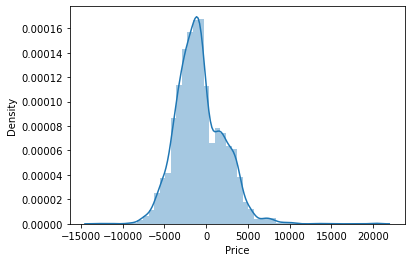

In [85]:
eval(adr)

GradientBoostingRegressor()
r2_score(predicted_train) is  0.7887937004754135


r2_score is : 0.7981422893485272


Score of trained data : 0.7887937004754135


Score of test data : 0.7981422893485272


Error
mean absolute error (MAE):  1438.1461136296
mean squared error (MSE):  3868492.465648911
RMSE 1966.848358580018


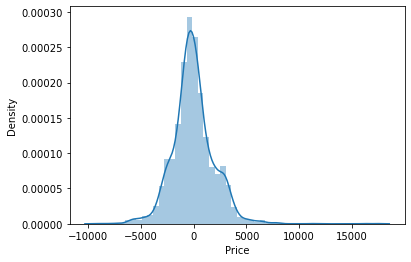

In [86]:
eval(gdr)

KNeighborsRegressor()
r2_score(predicted_train) is  0.7702677148605866


r2_score is : 0.6812799577701458


Score of trained data : 0.7702677148605866


Score of test data : 0.6812799577701458


Error
mean absolute error (MAE):  1707.4147475893365
mean squared error (MSE):  6108095.043970505
RMSE 2471.4560574629895


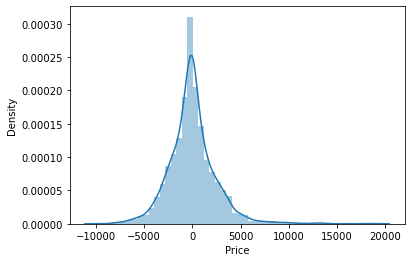

In [87]:
eval(knn)

Random Forest Regressor is considered to be the best model with a learning percentage of 95.53% and Accuarcy of 82.93% . we can cross check with cross validation for final model

# Cross Validation

In [88]:
model=[lr,dtr,rfr,svr,adr,gdr,knn]

for m in model:
    score=cross_val_score(m,x,y,scoring='r2',cv=5)
    print(m,"Cross val score is ",score)
    print("mean is ",score.mean())

LinearRegression() Cross val score is  [0.60293493 0.63655654 0.61906202 0.5914953  0.60530847]
mean is  0.6110714509923325
DecisionTreeRegressor() Cross val score is  [0.72155582 0.74201865 0.73427842 0.68165064 0.70661655]
mean is  0.7172240172077353
RandomForestRegressor() Cross val score is  [0.82106843 0.82412418 0.83450121 0.81543034 0.79946027]
mean is  0.818916885011291
SVR() Cross val score is  [0.00953985 0.00414467 0.02150026 0.02535674 0.01006869]
mean is  0.01412204327199984
AdaBoostRegressor(n_estimators=200) Cross val score is  [0.5878314  0.59122289 0.55335907 0.61517413 0.49409045]
mean is  0.5683355896763223
GradientBoostingRegressor() Cross val score is  [0.7877     0.79619817 0.79793548 0.78218387 0.76940946]
mean is  0.7866853947079422
KNeighborsRegressor() Cross val score is  [0.67985295 0.67272408 0.687748   0.6544397  0.64059199]
mean is  0.6670713423448194


# With respect to the r2 score and cross validation. It is found that Random Forest regressor is the best model with nearly 82 % accuracy . Let us hypertune it to increase accuracy.

# Hypertunning the model

In [89]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
# hyperparameter tuning of RandomForest

#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5,10]
#max_features
max_features=['auto','sqrt']
# generate a dictionary of all the Hyper Parameters
rand_params = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

In [91]:
from sklearn.model_selection import RandomizedSearchCV

rand_rfr= RandomizedSearchCV(estimator=rfr,param_distributions=rand_params,cv= 5,n_jobs=-1)

In [92]:
rand_rfr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]})

In [93]:
best_parameters=rand_rfr.best_params_

In [94]:
best_parameters

{'n_estimators': 830,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [95]:
rfr_hyp = RandomForestRegressor(n_estimators= 320, min_samples_split= 2, min_samples_leaf= 2, max_features= 'auto', max_depth= 24)
rfr_hyp.fit(x_train,y_train)

RandomForestRegressor(max_depth=24, min_samples_leaf=2, n_estimators=320)

RandomForestRegressor(max_depth=24, min_samples_leaf=2, n_estimators=320)
r2_score(predicted_train) is  0.9333284858859429


r2_score is : 0.8376216498369519


Score of trained data : 0.9333284858859429


Score of test data : 0.8376216498369519


Error
mean absolute error (MAE):  1089.804533810899
mean squared error (MSE):  3111892.1450309684
RMSE 1764.0555957880035


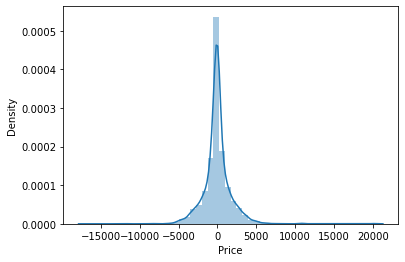

In [96]:
eval(rfr_hyp)

# After hypertuning, The accuracy of the model is increased by almost 2 percent that is from 82% to 84%. RandomForestRegressor (hypertuned model) is chosen to be the best model with almost 84% accuracy¶

RandomForestRegressor (hypertuned) Model is the final model

# Conclusion - Saving the model for future use¶


In [97]:
joblib.dump(rfr_hyp,"rfr_hyp_flightprice_prediction.obj")

['rfr_hyp_flightprice_prediction.obj']

In [98]:
#Lets Check loading the file 
flightprice_prediction=joblib.load("rfr_hyp_flightprice_prediction.obj")

In [99]:
flightprice_prediction.score(x_test,y_test)

0.8376216498369519

In [100]:
pred=rfr_hyp.predict(x_test)
Conclusion=pd.DataFrame([flightprice_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [101]:
Conclusion.round(2)

0        1        2        3        4         5         6     \
Predicted  12897.73  3653.95  6612.67  5135.47  8993.35  13797.72  10469.85   
Original   12897.73  3653.95  6612.67  5135.47  8993.35  13797.72  10469.85   

             7        8        9         10        11       12        13    \
Predicted  4899.6  2373.48  17568.0  27828.33  11834.03  3731.71  16307.46   
Original   4899.6  2373.48  17568.0  27828.33  11834.03  3731.71  16307.46   

               14        15        16       17       18      19       20    \
Predicted  12887.45  12402.94  17276.31  7141.16  3586.62  7422.3  3855.62   
Original   12887.45  12402.94  17276.31  7141.16  3586.62  7422.3  3855.62   

               21      22       23      24       25       26       27    \
Predicted  10066.16  9132.8  4258.55  4460.1  3898.65  4092.91  7761.28   
Original   10066.16  9132.8  4258.55  4460.1  3898.65  4092.91  7761.28   

               28       29       30       31        32       33       34    \
Predicted  10214.21  11788.8  4822.23  4946.81  12197.91  7697.25  3824.21   
Original   10214.21  11788.8  4822.23  4946.81  12197.91  7697.25  3824.21   

              35       36       37        38        39        40       41    \
Predicted  6296.75  6474.56  7137.81  10116.92  12311.15  12545.37  7571.14   
Original   6296.75  6474.56  7137.81  10116.92  12311.15  12545.37  7571.14   

              42       43       44        45        46       47        48    \
Predicted  11558.1  4262.98  2037.36  15365.69  14048.71  2024.12  12306.23   
Original   11558.1  4262.98  2037.36  15365.69  14048.71  2024.12  12306.23   

              49        50       51       52       53       54       55    \
Predicted  6611.71  13661.21  4160.49  6746.89  6740.39  3859.18  5878.04   
Original   6611.71  13661.21  4160.49  6746.89  6740.39  3859.18  5878.04   

              56        57       58        59        60        61       62    \
Predicted  7923.36  13547.46  9150.85  15238.91  12924.68  10579.74  5817.18   
Original   7923.36  13547.46  9150.85  15238.91  12924.68  10579.74  5817.18   

              63        64      65        66        67        68       69    \
Predicted  5012.37  15079.07  8792.9  18332.85  10527.41  10174.35  12258.9   
Original   5012.37  15079.07  8792.9  18332.85  10527.41  10174.35  12258.9   

              70        71       72       73       74       75        76    \
Predicted  6157.49  11705.65  12758.2  4092.24  8127.91  16751.2  11221.29   
Original   6157.49  11705.65  12758.2  4092.24  8127.91  16751.2  11221.29   

              77        78      79       80       81        82        83    \
Predicted  6018.16  13217.18  6532.8  9693.47  4842.87  17045.51  10333.52   
Original   6018.16  13217.18  6532.8  9693.47  4842.87  17045.51  10333.52   

               84       85       86        87        88       89      90    \
Predicted  12707.46  15865.2  9413.69  11288.32  18655.69  3958.28  1982.6   
Original   12707.46  15865.2  9413.69  11288.32  18655.69  3958.28  1982.6   

               91       92       93        94       95        96        97    \
Predicted  13092.09  6421.04  4923.01  11983.05  5459.88  11892.09  16507.44   
Original   13092.09  6421.04  4923.01  11983.05  5459.88  11892.09  16507.44   

               98        99       100       101       102      103      104   \
Predicted  12386.14  12762.89  7707.42  12863.63  11603.53  5220.35  8348.93   
Original   12386.14  12762.89  7707.42  12863.63  11603.53  5220.35  8348.93   

              105       106       107      108       109       110      111   \
Predicted  6581.34  12555.71  13940.52  8605.72  11061.52  12884.31  2232.13   
Original   6581.34  12555.71  13940.52  8605.72  11061.52  12884.31  2232.13   

               112       113     114      115       116     117       118   \
Predicted  11380.72  13089.53  2150.1  4031.51  15040.41  4403.9  11205.87   
Original   11380.72  13089.53  2150.1  4031.51  15040.41  4403.9  11205.87 

The model is working well

After Training and Testing 7 algorithm model. The best accuracy model was determined as random forest regressor with almost 84% accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

# Random Forest Regressor is the final model with 84.35% accuracy

# The problems we faced during this project were:

Website was poorly designed because the scrapping took a lot of time and there were many issues in accessing to next page.

More negative correlated data were present.

No information for handling these fast-paced websites were informed so that we were consuming more time in web scraping itself.


# Model Created Succesfully